In [21]:
from src.helpers.visualizer import plot_pareto_front
from src.warren_buffett import WarrenBuffett
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from helpers.data_loader import load_data, to_dataframe
from fortune_tellers import plot_predicitons_with_train_data

In [22]:
def reorder_weights(weights, asset_names, asset_index_map):
    reordered_weights = [0] * len(asset_order)
    for name, weight in zip(asset_names, weights):
        index = asset_index_map[name]
        reordered_weights[index] = weight
    return reordered_weights


def non_zero_indices(weights_list, decimals=3):
    # for i, weights in enumerate(weights_list):
    rounded_weights = np.round(weights_list, decimals=decimals)
    non_zero_indices = np.where(rounded_weights > 0)[0]
    return non_zero_indices
    # print(f"Non-zero indices for weights list: {non_zero_indices}")


def find_max_weight_index(weights_list):
    max_count = 0
    max_index = None
    for i, weights in enumerate(weights_list):
        count = np.sum(np.round(weights, decimals=3) > 0)
        if count > max_count:
            max_count = count
            max_index = i
    return max_index


def save_pareto_front(pareto_solutions, filename):
    with open(filename, 'w') as file:
        for _, _profit, _risk in pareto_solutions:
            formatted_profit = "{:,.6f}".format(_profit)
            formatted_risk = "{:,.6f}".format(_risk)
            file.write(f"{formatted_profit} {formatted_risk}\n")

In [23]:
SELECTED_PORTFOLIO_IDX = 35

In [24]:
preds = pd.read_csv("../res/predictions/predictions3.csv")
preds.rename(columns={"time": "Time"}, inplace=True)
preds.set_index("Time", inplace=True)
wb_ecm = WarrenBuffett(preds, "ecm", "../res/assets_bundles/Bundle3")
wb_wsm = WarrenBuffett(preds, "wsm", "../res/assets_bundles/Bundle3")

In [25]:
pareto_solutions_ecm = wb_ecm.make_me_rich()
pareto_solutions_wsm = wb_wsm.make_me_rich()

     pcost       dcost       gap    pres   dres
 0:  2.2171e-04 -1.0301e+00  1e+00  2e-16  6e+00
 1:  2.2137e-04 -1.0695e-02  1e-02  1e-16  6e-02
 2:  1.9818e-04 -3.8962e-04  6e-04  4e-17  3e-03
 3:  1.1733e-04 -5.2049e-05  2e-04  6e-17  2e-04
 4:  1.0443e-04  7.8923e-05  3e-05  6e-17  3e-05
 5:  9.8827e-05  9.6598e-05  2e-06  5e-17  4e-19
 6:  9.8513e-05  9.8440e-05  7e-08  6e-17  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2016e-04 -1.0249e+00  1e+00  2e-16  6e+00
 1:  2.1982e-04 -1.0649e-02  1e-02  3e-17  6e-02
 2:  1.9659e-04 -3.9448e-04  6e-04  4e-17  3e-03
 3:  1.1554e-04 -2.9804e-05  1e-04  2e-16  8e-05
 4:  1.0369e-04  8.1617e-05  2e-05  9e-17  9e-06
 5:  9.8753e-05  9.6906e-05  2e-06  1e-16  5e-19
 6:  9.8512e-05  9.8458e-05  5e-08  5e-17  4e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1907e-04 -1.0197e+00  1e+00  2e-16  6e+00
 1:  2.1873e-04 -1.0602e-02  1e-02  2e-16  6e-02
 2:  1.9541e-04 -3.9817e

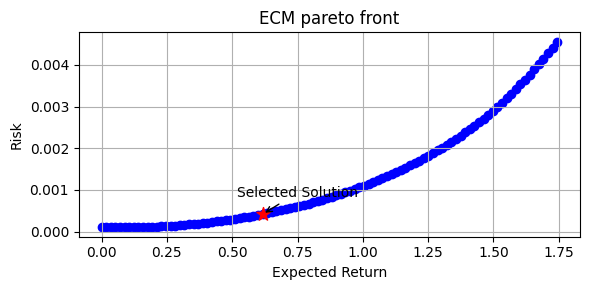

In [44]:
# fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='tight')
fig, axs = plt.subplots(1, 1, figsize=(6, 3), layout='tight')
# plot_pareto_front(axs[0], pareto_solutions_wsm, SELECTED_PORTFOLIO_IDX, title="WSM")
plot_pareto_front(axs, pareto_solutions_ecm, SELECTED_PORTFOLIO_IDX, title="ECM pareto front")
fig.savefig("../res/report/pareto_front.png")

In [27]:
def show_weights_for_assets(ax, asset_weights):
    asset_weights = {k: v for k, v in asset_weights.items() if v > 0.00009}
    asset_names = list(asset_weights.keys())
    weights = list(asset_weights.values())

    rects = ax.barh(asset_names, [w * 100 for w in weights], color='skyblue')
    ax.bar_label(rects, label_type='edge', fmt='%.2f')
    ax.set_xlabel('Percentage of Total Budget')
    ax.set_ylabel('Asset Name')
    ax.set_title('Portfolio Allocation')
    # ax.invert_yaxis()

In [28]:
TRAIN_SIZE = 201
PREDICT_SIZE = 100

historical_data = load_data("../res/assets_bundles/Bundle3")
historical_data = to_dataframe(historical_data)
historical_data_train = historical_data[201:]
historical_data_train.set_index("Time", inplace=True)

In [41]:
assets_names = np.array(wb_ecm.get_assets_keys())
selected = non_zero_indices(pareto_solutions_ecm[SELECTED_PORTFOLIO_IDX][0])

asset_order = [
    "SuperFuture", "Apples", "WorldNow", "Electronics123", "Photons",
    "SpaceNow", "PearPear", "PositiveCorrelation", "BetterTechnology",
    "ABCDE", "EnviroLike", "Moneymakers", "Fuel4", "MarsProject",
    "CPU-XYZ", "RoboticsX", "Lasers", "WaterForce", "SafeAndCare", "BetterTomorrow"
]

asset_index_map = {asset: index for index, asset in enumerate(asset_order, start=0)}


weights, profit, risk = pareto_solutions_ecm[SELECTED_PORTFOLIO_IDX]
weights = np.round(weights, decimals=6)

reordered_weights = reorder_weights(weights, assets_names, asset_index_map)
rounded_weights = np.round(reordered_weights, decimals=6)
final_weights = {}

for asset_name, weight in zip(asset_order, reordered_weights):
    final_weights[asset_name] = weight

# print("Final weights: ", final_weights)

# Save the portfolio to a file
# with open("../res/report/148234.txt", "w") as f:
#     f.write(f"{profit} {risk} {' '.join([f'{w:.6f}' for w in reordered_weights])}")

# print("reordered_weights: ", reordered_weights)

Final weights:  {'SuperFuture': 0.062686, 'Apples': 0.057658, 'WorldNow': 0.008735, 'Electronics123': 0.018338, 'Photons': 0.043684, 'SpaceNow': 0.01228, 'PearPear': 0.014019, 'PositiveCorrelation': 4e-06, 'BetterTechnology': 0.025674, 'ABCDE': 1e-06, 'EnviroLike': 0.058063, 'Moneymakers': 0.092465, 'Fuel4': 0.019337, 'MarsProject': 0.013907, 'CPU-XYZ': 8e-06, 'RoboticsX': 0.032326, 'Lasers': 0.000223, 'WaterForce': 0.071663, 'SafeAndCare': 0.172547, 'BetterTomorrow': 0.296383}


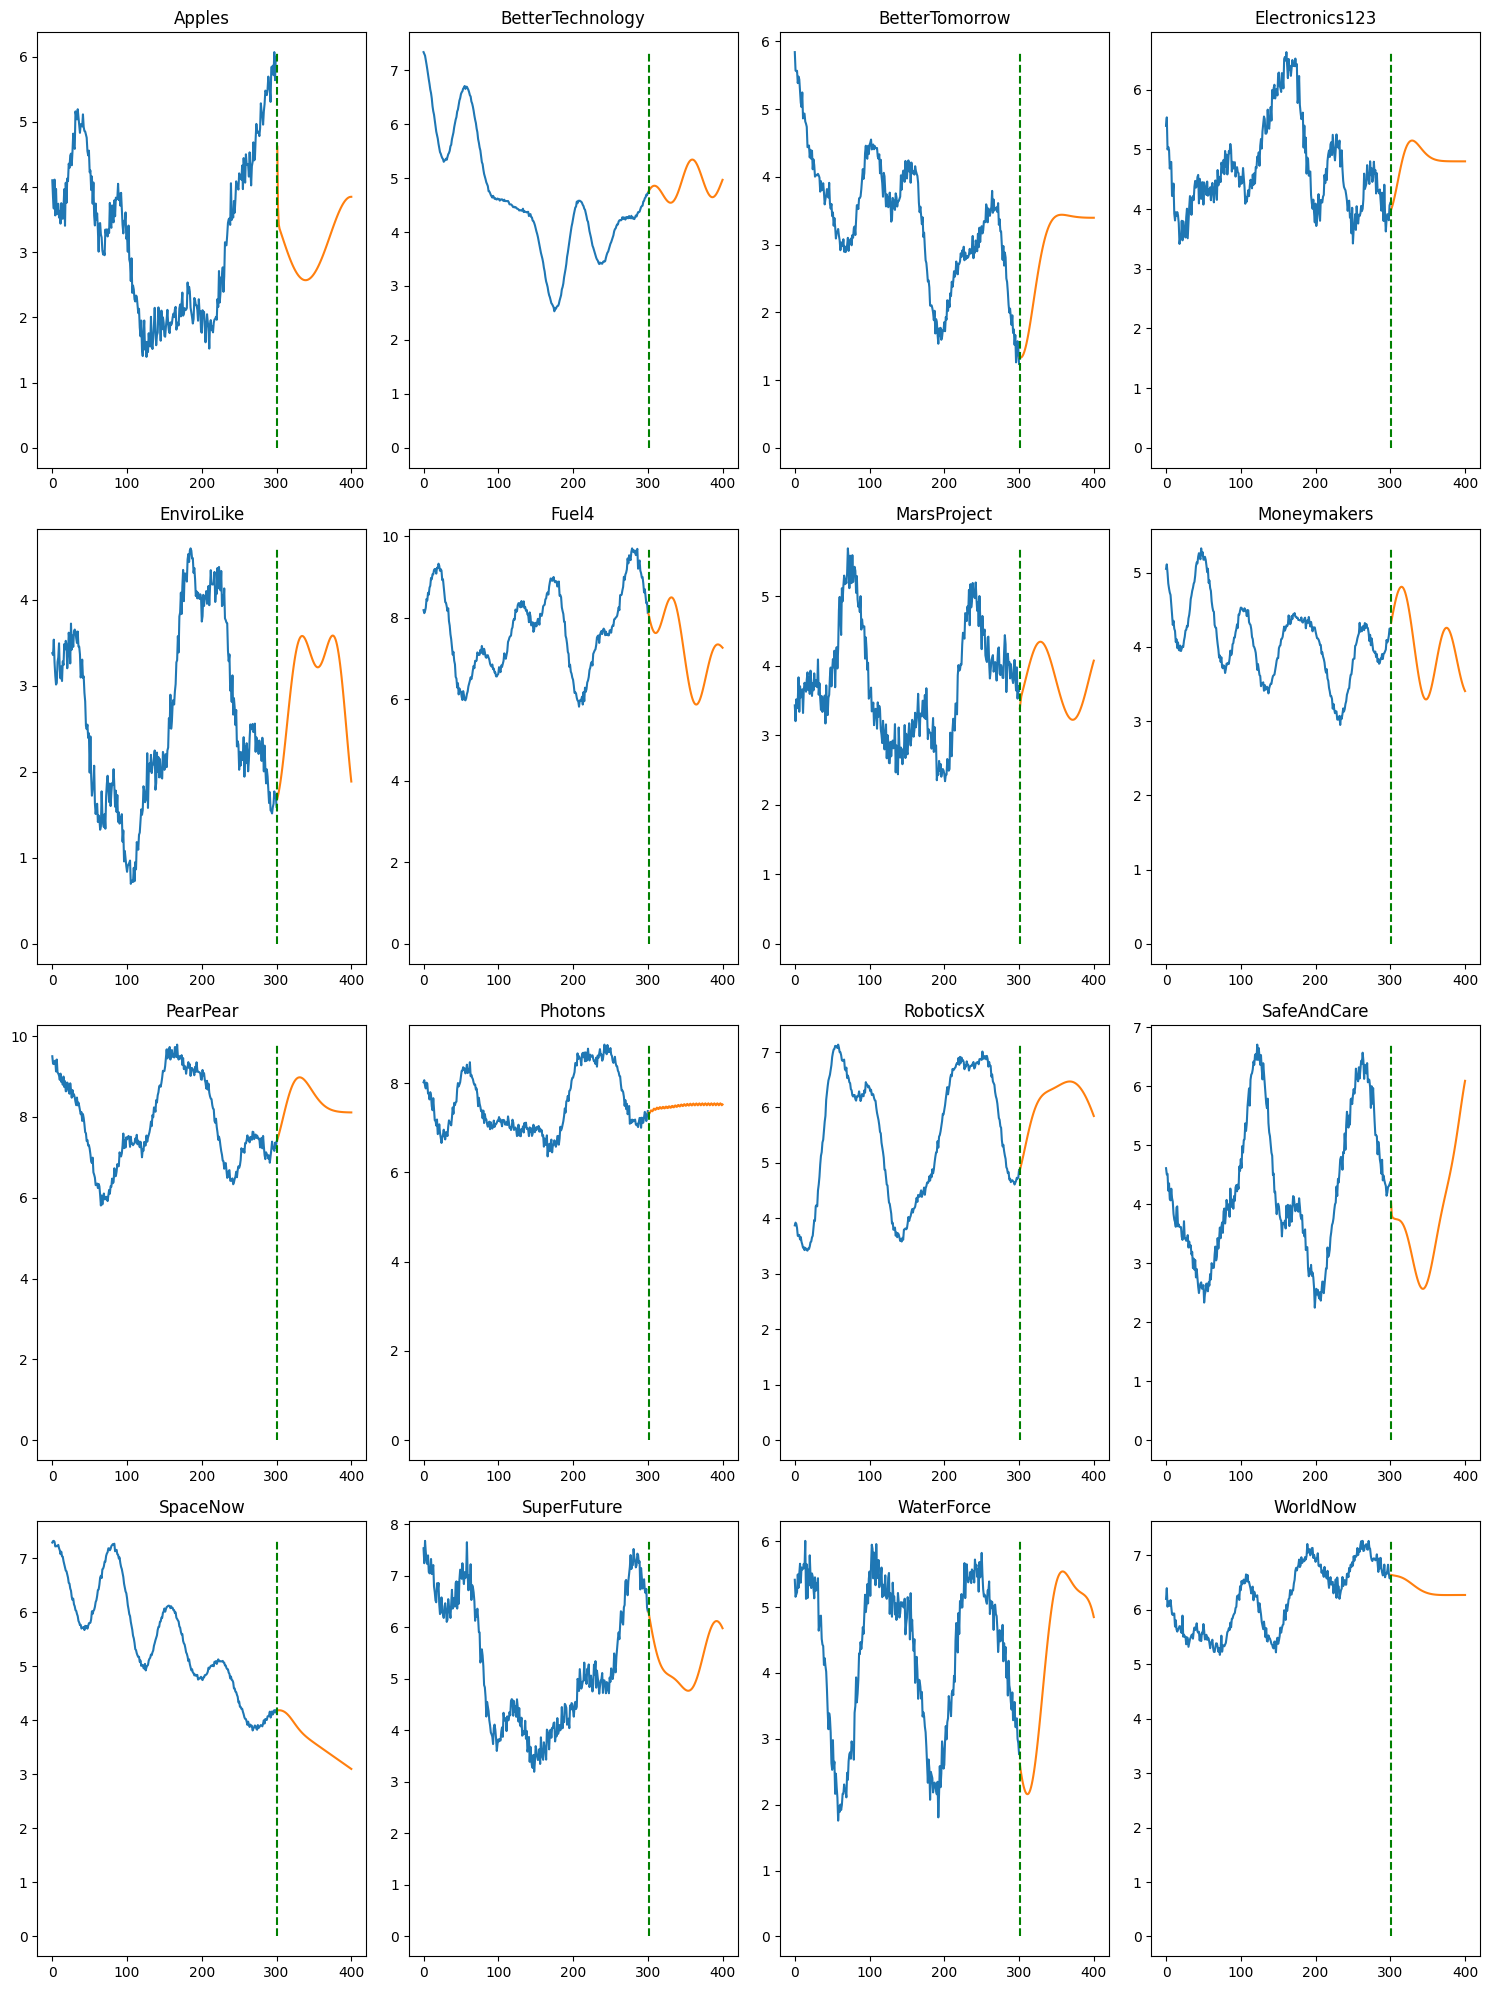

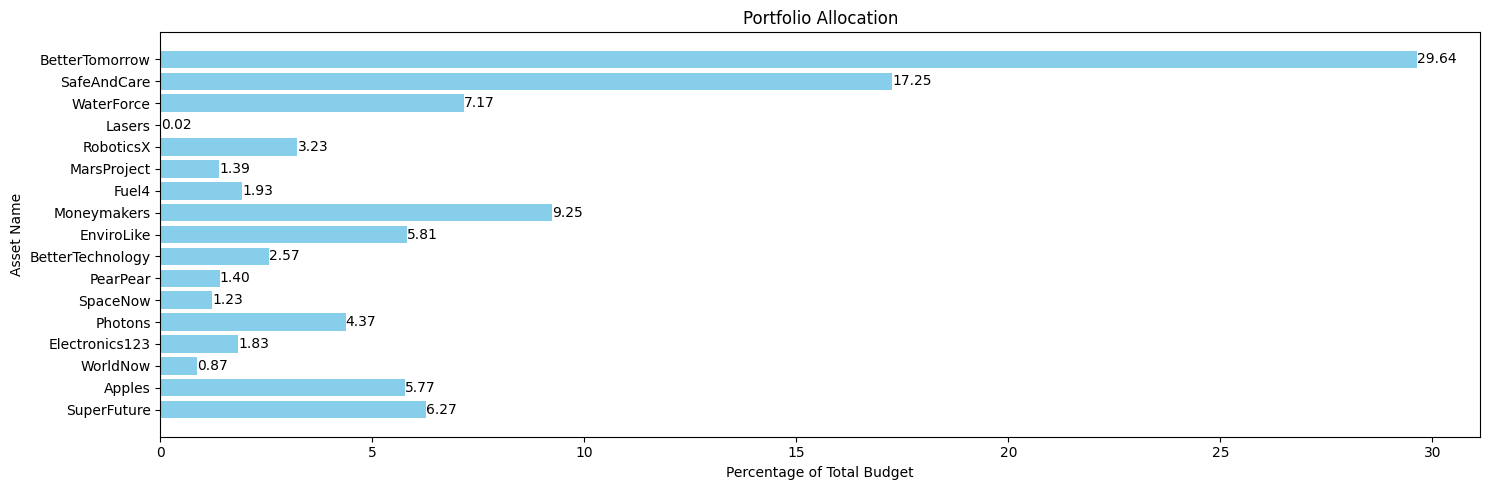

In [45]:
rows = int(np.ceil(len(assets_names[selected]) / 4))

fig1, axs = plt.subplots(rows, 4, figsize=(15, 5 * rows), layout='tight')
axs = axs.flatten()
plot_predicitons_with_train_data(axs, assets_names[selected], historical_data, preds, TRAIN_SIZE, PREDICT_SIZE)
fig1.savefig("../res/report/preds_for_selected_assets.png")

fig2, axs = plt.subplots(1, 1, figsize=(15, 5), layout='tight')
show_weights_for_assets(axs, final_weights)
fig2.savefig("../res/report/portfolio_allocation.png")